In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor
from catboost import CatBoostClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [7]:
df_scores = clf.negative_outlier_factor_
scores = np.sort(-df_scores[:])

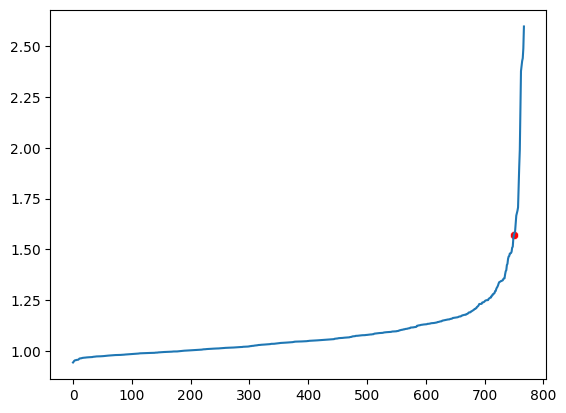

In [8]:
sns.lineplot(x=np.arange(len(scores)), y=scores);
sns.scatterplot(x=[750], y=scores[750], color="red");

In [9]:
esik_deger = -scores[750]
esik_deger

-1.5721145432225694

In [10]:
aykiri_degerler = df_scores > esik_deger
df = df[aykiri_degerler]

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X.shape, y.shape

((750, 8), (750,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [13]:
# Model

In [14]:
catb = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [15]:
catb.score(X_test, y_test)

0.776595744680851

In [16]:
catb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'lo

In [17]:
# Model Tuning

In [18]:
catb_params = {
    "iterations": [100, 500, 1000],
    "depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3]
}

In [19]:
catb_cv = GridSearchCV(CatBoostClassifier(), catb_params, cv=5, n_jobs=-1, verbose=2)
catb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6873483	total: 2.32ms	remaining: 1.16s
1:	learn: 0.6822800	total: 4.27ms	remaining: 1.06s
2:	learn: 0.6769746	total: 6.19ms	remaining: 1.02s
3:	learn: 0.6711199	total: 8.09ms	remaining: 1s
4:	learn: 0.6652676	total: 9.93ms	remaining: 983ms
5:	learn: 0.6615820	total: 11.9ms	remaining: 979ms
6:	learn: 0.6562583	total: 13.9ms	remaining: 982ms
7:	learn: 0.6514991	total: 15.7ms	remaining: 967ms
8:	learn: 0.6463937	total: 17.6ms	remaining: 958ms
9:	learn: 0.6417062	total: 19.6ms	remaining: 960ms
10:	learn: 0.6373705	total: 21.6ms	remaining: 959ms
11:	learn: 0.6329757	total: 23.3ms	remaining: 947ms
12:	learn: 0.6291889	total: 25.1ms	remaining: 942ms
13:	learn: 0.6248897	total: 27.1ms	remaining: 941ms
14:	learn: 0.6197233	total: 28.9ms	remaining: 935ms
15:	learn: 0.6152238	total: 30.8ms	remaining: 932ms
16:	learn: 0.6104299	total: 32.8ms	remaining: 933ms
17:	learn: 0.6067316	total: 34.9ms	remaining: 935ms
18:	learn: 0.60

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001206C67C190>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.3]},
             verbose=2)

In [20]:
catb_cv.best_params_

{'depth': 7, 'iterations': 500, 'learning_rate': 0.01}

In [21]:
catb_cv.best_score_

0.7670353982300885

In [22]:
# Final Model

In [24]:
catb_tuned = CatBoostClassifier(learning_rate=0.01, depth=7, iterations=500)
catb_tuned.fit(X_train, y_train, verbose=False)

In [25]:
catb_tuned.score(X_test, y_test)

0.7872340425531915

In [ ]:
# Değişken Gözlemleme

In [26]:
catb_tuned.feature_importances_

array([ 9.09688631, 25.02776779,  7.27760495,  7.56867222,  7.46273417,
       17.57210222, 13.20074142, 12.79349093])

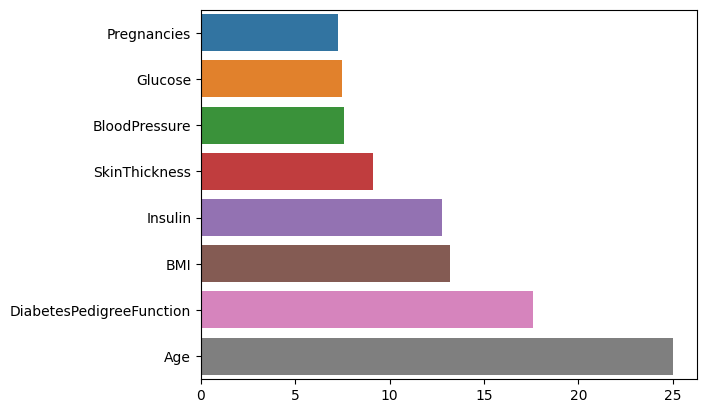

In [27]:
sns.barplot(y=X.columns, x=np.sort(catb_tuned.feature_importances_,));
# Değişkenlerin Önem Düzeyleri